In [2]:
import seaborn as sns
import os
import pandas as pd
import numpy as np
np.random.seed(1337)
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import ElasticNet
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

#train = pd.read_csv(r'C:\Users\s383387\OneDrive - Cranfield University\SSL Assignment\TimeToFail_prediction-master\train_selected.csv')
#test = pd.read_csv(r'C:\Users\s383387\OneDrive - Cranfield University\SSL Assignment\TimeToFail_prediction-master\test_selected.csv')
#test_ttf = pd.read_csv(r'C:\Users\s383387\OneDrive - Cranfield University\SSL Assignment\TimeToFail_prediction-master\test_selected_ttf.csv')
train = pd.read_csv('/Users/quent1/Library/CloudStorage/OneDrive-CranfieldUniversity/SSL Assignment/TimeToFail_prediction-master/train_selected.csv')
test = pd.read_csv(r'/Users/quent1/Library/CloudStorage/OneDrive-CranfieldUniversity/SSL Assignment/TimeToFail_prediction-master/test_selected.csv')
test_ttf = pd.read_csv(r'/Users/quent1/Library/CloudStorage/OneDrive-CranfieldUniversity/SSL Assignment/TimeToFail_prediction-master/test_selected_ttf.csv')


scaler = MinMaxScaler()
train =train.drop(['label_bnc'],axis=1)

Y_train = train.loc[:, ['ttf']]

#test =test.drop(['id'],axis=1)
X_test = test
X_test = test.drop(['id'],axis=1)
#X_test = X_test.drop(X_test.index[[0,1,2]])
#X_test = X_test.reset_index(drop=True)

Y_test = test_ttf.loc[:, ['ttf']]
#Y_test = Y_test.drop(Y_test.index[[0,1,2]])
#Y_test = Y_test.reset_index(drop=True)

train

,id,cycle,s1,s2,s3,s4,ttf
0,1,1,1400.60,554.36,47.47,521.66,191
1,1,2,1403.14,553.75,47.49,522.28,190
2,1,3,1404.20,554.26,47.27,522.42,189
3,1,4,1401.87,554.45,47.13,522.86,188
4,1,5,1406.22,554.00,47.28,522.19,187
...,...,...,...,...,...,...,...
20626,100,196,1428.63,551.43,48.07,519.49,4
20627,100,197,1433.58,550.86,48.04,519.68,3
20628,100,198,1428.18,550.94,48.09,520.01,2
20629,100,199,1426.53,550.68,48.39,519.67,1


In [3]:
X_train = train 
X_train = X_train.drop(["ttf"], axis=1)
X_train = X_train.drop(["id"], axis=1)

X_train


,cycle,s1,s2,s3,s4
0,1,1400.60,554.36,47.47,521.66
1,2,1403.14,553.75,47.49,522.28
2,3,1404.20,554.26,47.27,522.42
3,4,1401.87,554.45,47.13,522.86
4,5,1406.22,554.00,47.28,522.19
...,...,...,...,...,...
20626,196,1428.63,551.43,48.07,519.49
20627,197,1433.58,550.86,48.04,519.68
20628,198,1428.18,550.94,48.09,520.01
20629,199,1426.53,550.68,48.39,519.67


Preprocessing


In [6]:
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled)

,0,1,2,3,4
0,0.000000,0.309757,0.726248,0.369048,0.633262
1,0.002770,0.352633,0.628019,0.380952,0.765458
2,0.005540,0.370527,0.710145,0.250000,0.795309
3,0.008310,0.331195,0.740741,0.166667,0.889126
4,0.011080,0.404625,0.668277,0.255952,0.746269
...,...,...,...,...,...
20626,0.540166,0.782917,0.254428,0.726190,0.170576
20627,0.542936,0.866475,0.162641,0.708333,0.211087
20628,0.545706,0.775321,0.175523,0.738095,0.281450
20629,0.548476,0.747468,0.133655,0.916667,0.208955


REGRESSOR 


GRADIENT BOOSTING REGRESSOR


In [89]:

from sklearn.model_selection import cross_validate
GBR_regressor =  GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.5,n_estimators= 100)
cv_results = cross_validate(GBR_regressor, X_train_scaled, np.ravel(Y_train), cv=15,return_estimator=True)

score_GBR = cv_results["estimator"][0].predict(X_test_scaled)

In [91]:
from sklearn import metrics
print("GBR", "{:.2%}".format(metrics.r2_score(Y_test, score_GBR)))

GBR 56.74%


In [93]:
print("The Mean Absolute Error (MAE) is:",
 round(metrics.mean_absolute_error(Y_test, score_GBR),2))

The Mean Absolute Error (MAE) is: 22.22


In [94]:
print("The Root Mean Squared Error (RMSE) is:",
 round(np.sqrt(metrics.mean_squared_error(Y_test, score_GBR)),2))

The Root Mean Squared Error (RMSE) is: 27.33


In [49]:
df1 = pd.concat([Y_test, pd.Series(score_GBR)], axis=1)
df1.columns = ['true', 'predicted']
df1['diff'] = df1['predicted']-df1['true']


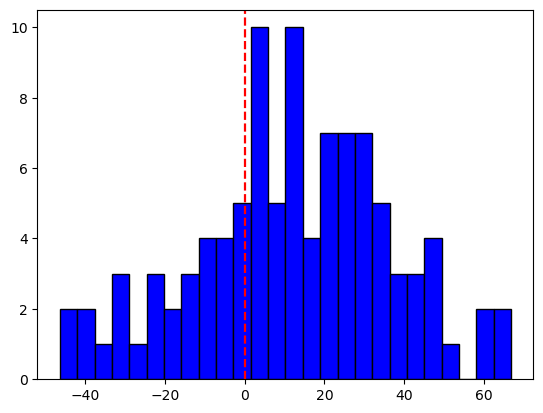

In [41]:

plt.hist(df1['diff'], bins=26, color="blue", edgecolor='black', linewidth=1)
plt.axvline(0, color="red", linestyle='dashed', linewidth=1.6)
plt.show()

In [42]:
pd.DataFrame({'Count': [(df1['diff']<0).sum(), (df1['diff']==0).sum(),
 (df1['diff']>0).sum()]}, columns=['Count'],
 index=['Smaller', 'Zero', 'Larger'])

,Count
Smaller,29
Zero,0
Larger,71


In [77]:
feature_labels = np.array([ 'cycle', 's1', 's2','s3','s4'])
importance = cv_results["estimator"][0].feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
 print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

cycle-75.52%
s3-11.75%
s1-6.09%
s4-4.08%
s2-2.55%


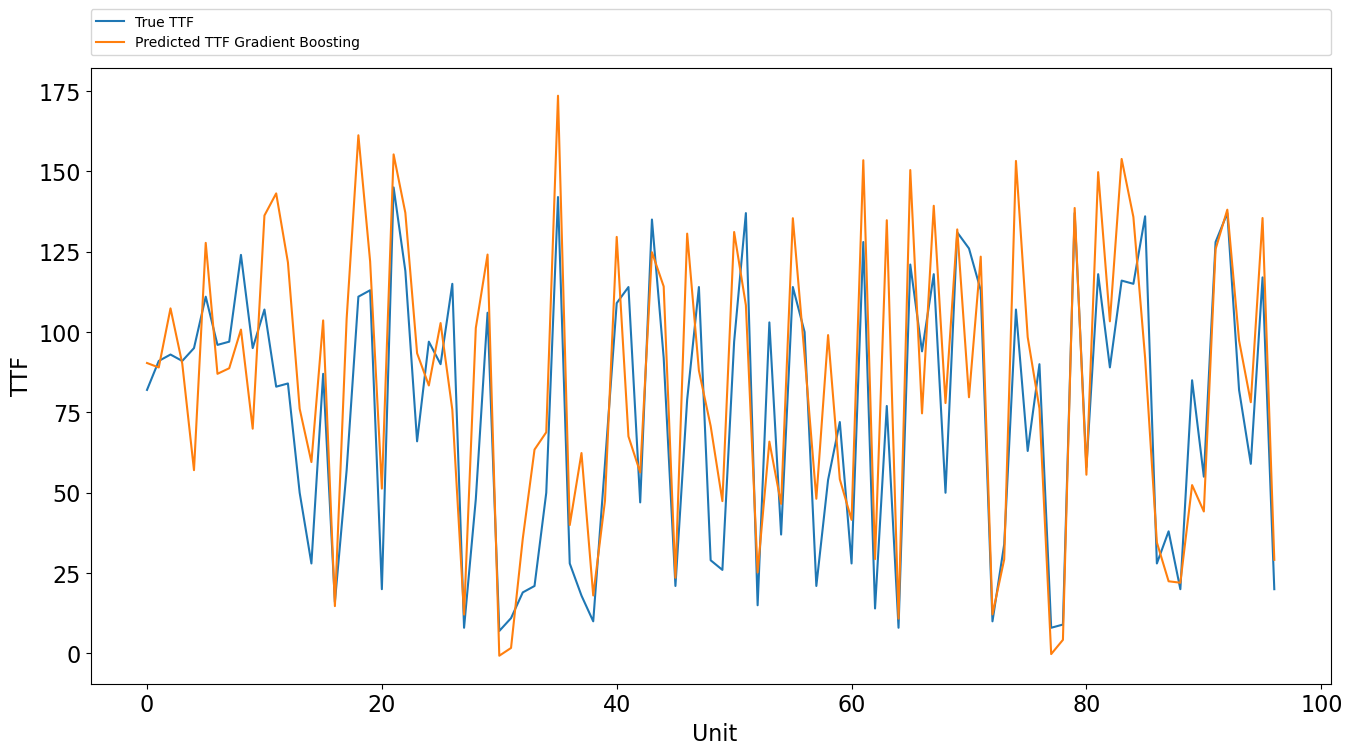

In [278]:
plt.figure(figsize = (16, 8))
plt.plot(Y_test)
plt.plot(score_GBR)
plt.xlabel(' Unit', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('TTF', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['True TTF','Predicted TTF Gradient Boosting'], bbox_to_anchor=(0., 1.02, 1., .102),
           loc=3, mode="expand", borderaxespad=0)
plt.show()

KNN

In [51]:


from sklearn.naive_bayes import GaussianNB
KNN = KNeighborsRegressor()

model_KNN = cross_validate(KNN, X_train_scaled, np.ravel(Y_train), cv=15,return_estimator=True)

model_KNN = model_KNN["estimator"][0].predict(X_test_scaled)


In [52]:
from sklearn import metrics
print("KNN", "{:.2%}".format(metrics.r2_score(Y_test, model_KNN)))

KNN 50.20%


In [53]:
print("The Mean Absolute Error (MAE) is:",
 round(metrics.mean_absolute_error(Y_test, model_KNN),2))

The Mean Absolute Error (MAE) is: 22.41


In [54]:
print("The Root Mean Squared Error (RMSE) is:",
 round(np.sqrt(metrics.mean_squared_error(Y_test, model_KNN)),2))

The Root Mean Squared Error (RMSE) is: 29.33


In [55]:
df1 = pd.concat([Y_test, pd.Series(model_KNN)], axis=1)
df1.columns = ['true', 'predicted']
df1['diff'] = df1['predicted']-df1['true']

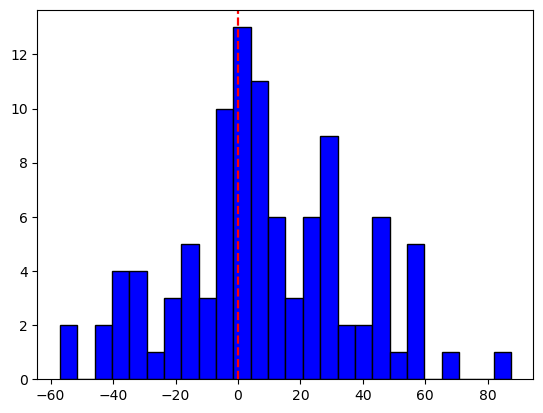

In [56]:

plt.hist(df1['diff'], bins=26, color="blue", edgecolor='black', linewidth=1)
plt.axvline(0, color="red", linestyle='dashed', linewidth=1.6)
plt.show()

In [57]:
pd.DataFrame({'Count': [(df1['diff']<0).sum(), (df1['diff']==0).sum(),
 (df1['diff']>0).sum()]}, columns=['Count'],
 index=['Smaller', 'Zero', 'Larger'])

,Count
Smaller,40
Zero,0
Larger,60


In [ ]:
feature_labels = np.array([ 'cycle', 's1', 's2','s3','s4'])
importance = regressor.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
 print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

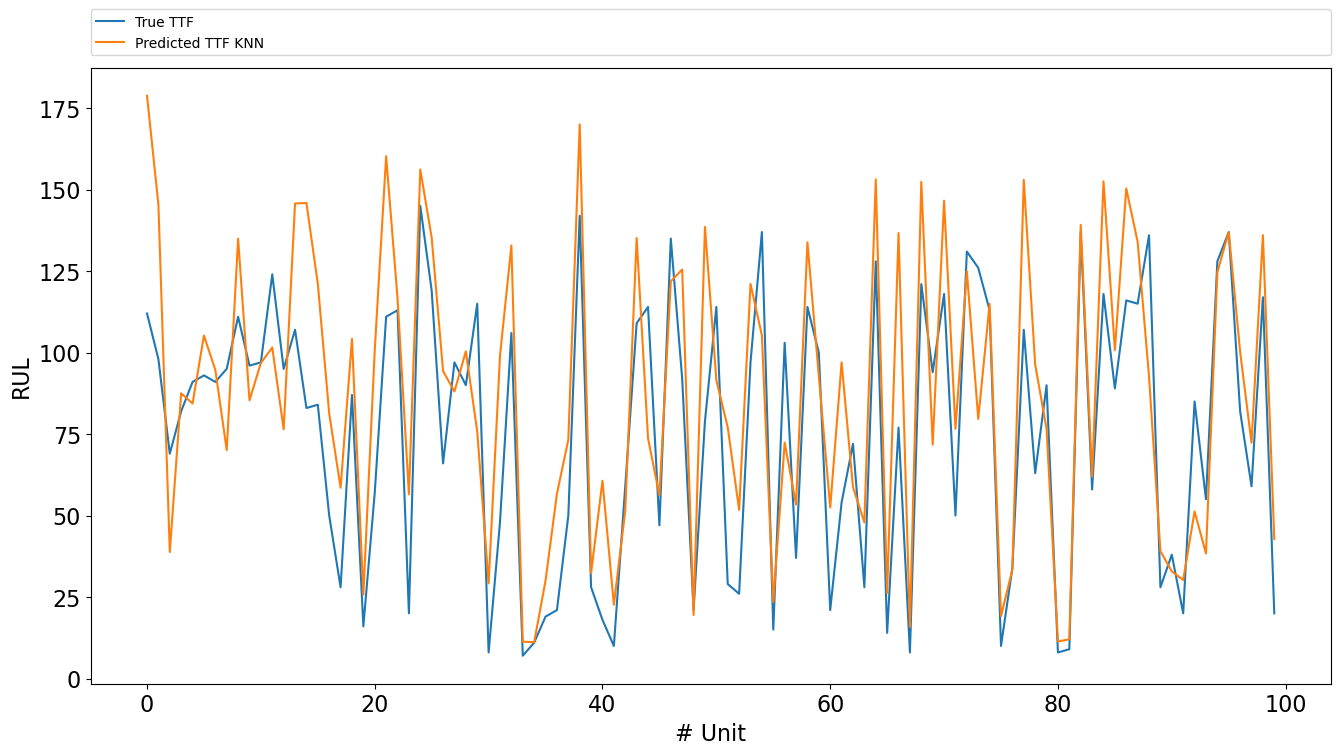

In [69]:
plt.figure(figsize = (16, 8))
plt.plot(Y_test)
plt.plot(score_GBR)
plt.xlabel('# Unit', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('KNN', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['True TTF','Predicted TTF KNN'], bbox_to_anchor=(0., 1.02, 1., .102),
           loc=3, mode="expand", borderaxespad=0)
plt.show()

POLYNOMIAL

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#define our polynomial model, with whatever degree we want
degree=3

# PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
# of the features with a degree less than or equal to the degree we just gave the model (2)
poly_model = PolynomialFeatures(degree=degree)

# transform out polynomial features
poly_x_values = poly_model.fit_transform(X_train_scaled)

poly_xtest_values = poly_model.transform(X_test_scaled)

# should be in the form [1, a, b, a^2, ab, b^2]
#print(f'initial values {X_train[0]}\nMapped to {poly_x_values[0]}')

# [1, a=5, b=2940, a^2=25, 5*2940=14700, b^2=8643600]

poly_model.fit(poly_x_values, Y_train)

# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()

regression_model.fit(poly_x_values, Y_train)

y_pred = regression_model.predict(poly_xtest_values)




In [59]:

  
cv_results = cross_validate(regression_model, poly_x_values, np.ravel(Y_train), cv=14,return_estimator=True)

score_po = cv_results["estimator"][0].predict(poly_xtest_values)

In [60]:
print("LR", "{:.2%}".format(metrics.r2_score(Y_test, score_po)))

LR 58.13%


In [61]:
print("The Root Mean Squared Error (RMSE) is:",
 round(np.sqrt(metrics.mean_squared_error(Y_test, score_po)),2))

The Root Mean Squared Error (RMSE) is: 26.89


In [62]:
print("The Mean Absolute Error (MAE) is:",
 round(metrics.mean_absolute_error(Y_test, score_po),2))

The Mean Absolute Error (MAE) is: 21.76


In [64]:
df1 = pd.concat([Y_test, pd.Series(score_po)], axis=1)
df1.columns = ['true', 'predicted']
df1['diff'] = df1['predicted']-df1['true']

In [65]:
pd.DataFrame({'Count': [(df1['diff']<0).sum(), (df1['diff']==0).sum(),
 (df1['diff']>0).sum()]}, columns=['Count'],
 index=['Smaller', 'Zero', 'Larger'])

,Count
Smaller,33
Zero,0
Larger,67


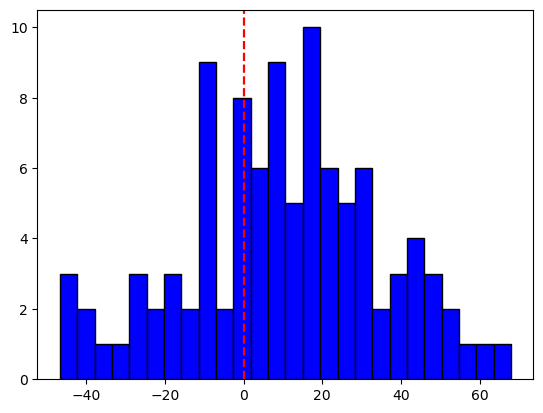

In [66]:

plt.hist(df1['diff'], bins=26, color="blue", edgecolor='black', linewidth=1)
plt.axvline(0, color="red", linestyle='dashed', linewidth=1.6)
plt.show()

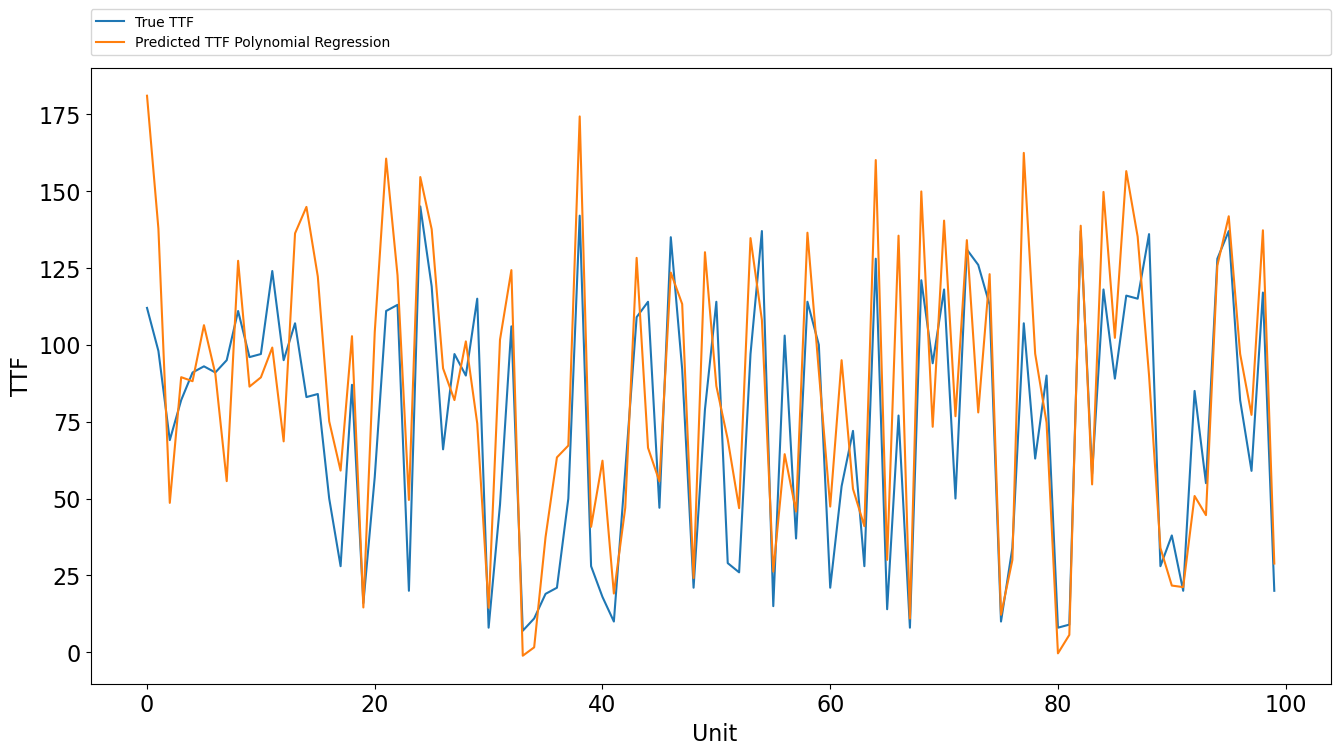

In [73]:
plt.figure(figsize = (16, 8))
plt.plot(Y_test)
plt.plot(y_pred)
plt.xlabel(' Unit', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('TTF', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['True TTF','Predicted TTF Polynomial Regression'], bbox_to_anchor=(0., 1.02, 1., .102),
           loc=3, mode="expand", borderaxespad=0)
plt.show()

SMOOTHING


In [26]:
import scipy

from scipy import signal

def lissage_savgol(X):
    X_lissed = pd.DataFrame(columns=['id', 'cycle', 's1','s2','s3','s4'])
    for i in range(1,101):
        
            y_smooth_s1 = signal.savgol_filter(train[train.id==i].s1, window_length=10, polyorder=3, mode="nearest")
            y_smooth_s2 = signal.savgol_filter(train[train.id==i].s2, window_length=10, polyorder=3, mode="nearest")
            y_smooth_s3 = signal.savgol_filter(train[train.id==i].s3, window_length=10, polyorder=3, mode="nearest")
            y_smooth_s4 = signal.savgol_filter(train[train.id==i].s4, window_length=10, polyorder=3, mode="nearest")
            y_smooth_s1.reshape(-1,1)
    
            df = pd.DataFrame({'id': i , 'cycle': [i+1 for i in range(y_smooth_s1.shape[0])],'s1':y_smooth_s1, 's2': y_smooth_s2, 's3': y_smooth_s3, 's4': y_smooth_s4 }, index = [i+1 for i in range(y_smooth_s1.shape[0])]
                     )

            X_lissed = pd.concat([X_lissed,df])
    return X_lissed
X_train_lissed = lissage_savgol(train)
X_train_lissed = X_train_lissed.drop(['id'], axis=1)


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics

#define our polynomial model, with whatever degree we want
degree=3

# PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
# of the features with a degree less than or equal to the degree we just gave the model (2)
poly_model = PolynomialFeatures(degree=degree)

# transform out polynomial features
poly_x_values = poly_model.fit_transform(X_train_lissed)

poly_xtest_values = poly_model.transform(X_test)

# should be in the form [1, a, b, a^2, ab, b^2]
#print(f'initial values {X_train[0]}\nMapped to {poly_x_values[0]}')

# [1, a=5, b=2940, a^2=25, 5*2940=14700, b^2=8643600]

poly_model.fit(poly_x_values, Y_train)

# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()

regression_model.fit(poly_x_values, Y_train)

y_pred = regression_model.predict(poly_xtest_values)

In [21]:
from sklearn import metrics

print("LR", "{:.2%}".format(metrics.r2_score(Y_test, y_pred)))

LR 56.80%


In [22]:
print("The Root Mean Squared Error (RMSE) is:",
 round(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)),2))

The Root Mean Squared Error (RMSE) is: 27.31
